<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 2. Geomorphology
## Simple integration

----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we apply simple integration methods for functions with one variable.

As a first step, we import the `numpy`, the `matplotlib` library, and the `scipy` library to be generally available.
Note that from *scipy*, only the package `integrate` is imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## Simple integration methods

Next, we define a simple function:
$$
f_1(x) = 4 - x^2
$$
which is a parabola, flipped in the vertical direction ($y$-axis), and shifted by $4$ vertically.

Next, we define the parabola along the range $x \in [-2,2]$, and plot it.

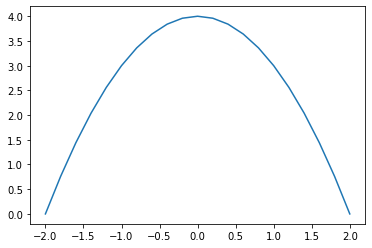

In [2]:
def f1(x):
    y = 4 - x**2
    return y

x = np.linspace(-2,2,21)
y = f1(x)
plt.plot(x,y)

Now we want to solve the following integral:
$$
I1 = \int\limits_{-2}^{+2} \left( 4 - x^2 \right) dx
$$
Solving the integral analytically, we obtain
$$
I1 = \left[ 4x - {{1}\over{3}} x^3 \right]_{-2}^{+2} \sim 10.67
$$

In [3]:
def F(x):
    F = 4*x - x**3/3
    return F

print(F(2)-F(-2))

10.666666666666668


Now we apply three different methods from the numerical integration toolbox:

1. Simpson's rule

2. Gauss Quadrature

3. Romberg integration

Note that for the Simpson's rule, we need to plug in the $x$ and $y$ arrays, while for the
other two methods, we hand down the function and the integration limits.
(why is `python` often so inconsistent?) 

For the Simpson rule, we test the discretisation...

In [7]:
# Simpson
for i in range(1,10):
    x = np.linspace(-2,2,i)
    y1 = f1(x)
    Isimpson = integrate.simps(y1, x)
    print ('Simpson: ',i,Isimpson)

# Gauss
Igauss = integrate.quad(f1,-2,2)
print ('Quadrature: ',Igauss[0])

# Romberg-integration
Iromberg = integrate.romberg(f1,-2,2,show='False')
print ('Romberg: ',Iromberg)

Simpson:  1 0.0
Simpson:  2 0.0
Simpson:  3 10.666666666666666
Simpson:  4 10.271604938271604
Simpson:  5 10.666666666666666
Simpson:  6 10.581333333333331
Simpson:  7 10.666666666666668
Simpson:  8 10.635568513119532
Simpson:  9 10.666666666666666
Quadrature:  10.666666666666668
Romberg integration of <function vectorize1.<locals>.vfunc at 0x116c2f730> from [-2, 2]

 Steps  StepSize   Results
     1  4.000000  0.000000 
     2  2.000000  8.000000 10.666667 
     4  1.000000 10.000000 10.666667 10.666667 

The final result is 10.666666666666666 after 5 function evaluations.
Romberg:  10.666666666666666


So the *true* value (to our numerical precision), is around $10.\bar{6}$.

I just leave you here with these three methods, without further explanation, as this is task of the
lecture **Numerical methods in geosciences**.

## Gauss distribution: probability function ...

Now we return to the classical **Gaussian** curve, given as probability:
$$
p_i(x) = {{1} \over {\sqrt{2\pi \sigma^2}}} e^{-{{(x-\mu)^2} \over {2\sigma^2}}}
$$
with $\mu$ and $\sigma$ the **mean** and the **standard deviation** for the distribution.

<ErrorbarContainer object of 3 artists>

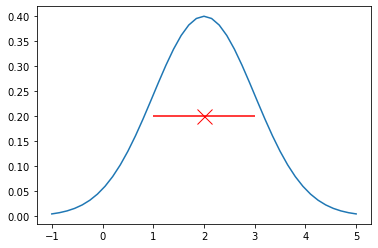

In [8]:
# mean mu and standard deviation sigma
mu    = 2.
sigma = 1.

def gauss_probability(x):
    # Gauss probability function y=p_i(x)
    y = 1/(sigma * np.sqrt(2*np.pi)) * np.exp( -(x-mu)**2 / (2*sigma**2) )
    return y

# plot function first for visualisation
x = np.linspace(-3*sigma+mu,3*sigma+mu,41)
y = gauss_probability(x)
plt.plot(x,y)
plt.plot(mu,0.2,linestyle='none',marker='x',markersize=15,color='red')
plt.errorbar(mu, 0.2, xerr=sigma,color='red')

## Gauss distribution: the $\sigma$ estimates ...

We have said, that the probabilities for a sample to be within the $\pm 1\sigma$, $\pm 2\sigma$,
or $\pm 3\sigma$ range is:

- Around 68.27 % of all points are within the $1 \sigma$ uncertainty.
- Around 95.45 % of all points are within the $2 \sigma$ uncertainty.
- Around 99.73 % of all points are within the $3 \sigma$ uncertainty.

Let's calculate these values. We just need to integrate the above function from
$x \in [-1 \sigma,+1 \sigma]$,
$x \in [-2 \sigma,+2 \sigma]$,
$x \in [-3 \sigma,+3 \sigma]$.

In [9]:
# perform numerical integration three times
onesigma   = integrate.quad(gauss_probability,-1*sigma+mu,1*sigma+mu)
twosigma   = integrate.quad(gauss_probability,-2*sigma+mu,2*sigma+mu)
threesigma = integrate.quad(gauss_probability,-3*sigma+mu,3*sigma+mu)
print ("%s %4.2f %s" % ('1-sigma: ',100*onesigma[0],'%'))
print ("%s %4.2f %s" % ('2-sigma: ',100*twosigma[0],'%'))
print ("%s %4.2f %s" % ('3-sigma: ',100*threesigma[0],'%'))

1-sigma:  68.27 %
2-sigma:  95.45 %
3-sigma:  99.73 %


Voila, there we are!